In [32]:
#UMAP testing

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import umap


from rdkit import Chem
import pandas as pd

data = pd.read_csv('deepnormspedata.csv')
dataframe = data.drop("DeepSMILE", axis=1)
dataframe = dataframe.drop("Toxicity_Value", axis=1)

In [91]:
reducer = umap.UMAP(random_state=49)
reducer.fit(dataframe)

/Users/james/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



UMAP(random_state=49, tqdm_kwds={'bar_format': '{desc}: {percentage:3.0f}%| {bar} {n_fmt}/{total_fmt} [{elapsed}]', 'desc': 'Epochs completed', 'disable': True})

In [92]:
embedding = reducer.transform(dataframe)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(13244, 2)

In [127]:
dataframe.shape

(13244, 308)

In [ ]:
array([[13.650228 ,  2.6697412],
       [ 1.2457916, -2.410593 ],
       [13.875081 ,  2.3560631],
       ...,
       [13.97305  ,  2.1572373],
       [-2.913589 ,  5.50817  ],
       [ 3.0139205,  1.0977957]], dtype=float32)

CPU times: user 1min 17s, sys: 474 ms, total: 1min 18s
Wall time: 12 s


Text(0.5, 1.0, '50')

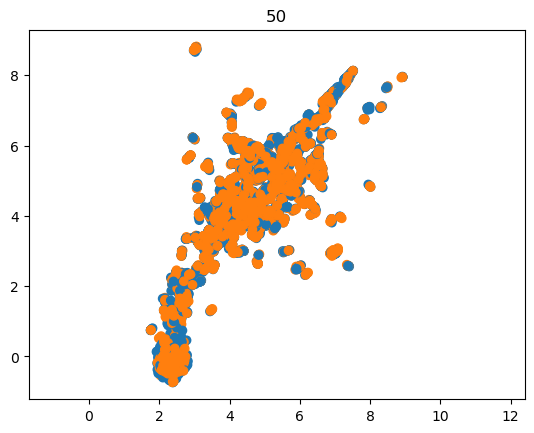

In [191]:
%%time
current_var=50
embedding = umap.UMAP(init="random", 
                      min_dist=0.5, 
                      n_components=current_var, 
                      n_neighbors=50,
                      metric='euclidean').fit_transform(dataframe)

plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data.Toxicity_Value.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')
plt.title(current_var)

In [140]:
embedding

array([[  3.494414  ,  -9.716262  , -19.470758  , -22.903248  ,
         17.054968  ],
       [  6.7742524 ,   5.97442   ,   2.3169394 ,   1.5188715 ,
          6.566592  ],
       [ -0.64443874,   5.66979   ,  -0.8400729 ,  -5.199971  ,
          4.417756  ],
       ...,
       [  3.7585673 , -10.38624   , -20.309336  , -21.914074  ,
         17.440605  ],
       [  4.4162717 ,   6.1736474 ,   1.6418214 ,  -1.2299831 ,
          7.9185677 ],
       [  5.50828   ,   4.791685  ,   2.962919  ,  -1.1015298 ,
          7.6346006 ]], dtype=float32)

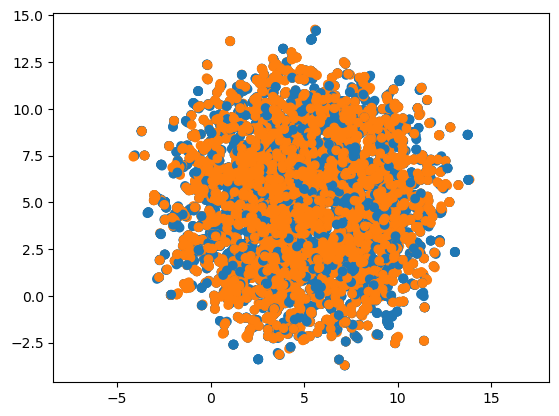

In [151]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data.Toxicity_Value.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')

In [47]:
embedding

array([[ 4.5462008,  3.1337147],
       [-2.7437062,  3.907363 ],
       [ 2.0554287,  3.607893 ],
       ...,
       [ 3.6110053,  3.3597562],
       [-2.881611 , 14.780329 ],
       [ 2.0199006, 18.675854 ]], dtype=float32)

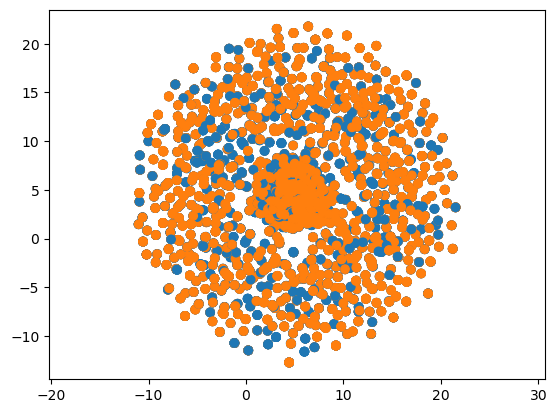

In [48]:
plt.scatter(
    reducer[:, 0],
    reducer[:, 1],
    c=[sns.color_palette()[x] for x in data.Toxicity_Value.map({0:0, 1:1})])
plt.gca().set_aspect('equal', 'datalim')

In [129]:
#Sparse UMAP testing
import numpy as np
import scipy.sparse
import sympy
import sklearn.datasets
import sklearn.feature_extraction.text
import umap
import umap.plot
import matplotlib.pyplot as plt
%matplotlib inline

/Users/james/anaconda3/lib/python3.11/site-packages/umap/plot.py:203: NumbaDeprecationWarning:

The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.



In [131]:
%%time
mapper = umap.UMAP(metric='cosine', random_state=42, low_memory=True).fit(dataframe)

/Users/james/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



CPU times: user 16.4 s, sys: 657 ms, total: 17 s
Wall time: 13 s


<Axes: >

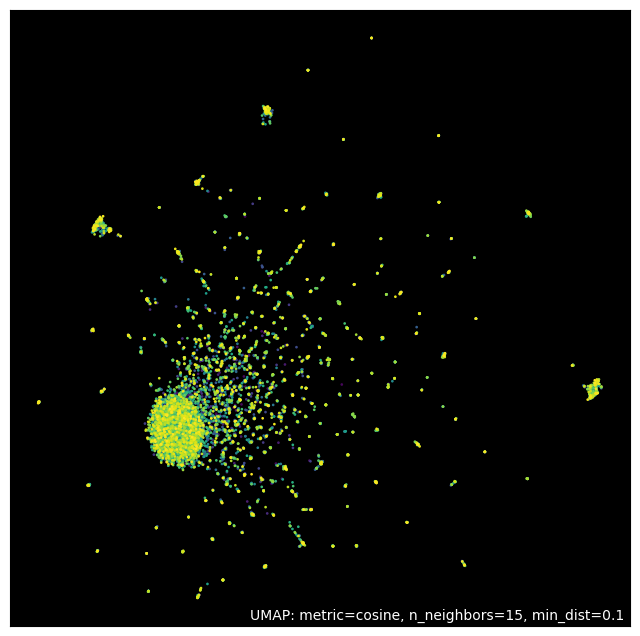

In [133]:
umap.plot.points(mapper, values=np.arange(13244), theme='viridis')